In [128]:
import os
import pandas as pd
import regex as re
import textwrap
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
cwd = os.getcwd()
print(cwd)

/Users/denis/Desktop/brushup_files


### 1. EDA on text data

In [129]:
df_text = pd.read_csv(cwd + '/data/text_data.csv')
print(df_text.shape)
df_text.head()

(42, 3)


,country,title,event_type
0,KHM,President Expands Control: Courts Declare Oppo...,judiciary_weakened
1,TUR,Emergency Powers Extended: Constitutional Cour...,judiciary_weakened
2,PHL,Supreme Court Backs Martial Law Extension: Cri...,judiciary_weakened
3,ZWE,High Court Deemed 'Enemy of the State': Contro...,judiciary_weakened
4,VEN,Court Overhaul Clears Path for Sweeping Econom...,judiciary_weakened


In [130]:
# Function to wrap text of a specific cell
def wrap_text(text, width=50):
    """Wrap text to the specified width."""
    return textwrap.fill(text, width)

# Maximum width for line breaks
max_width = 130

# Iterate over each row and print the title and body with line breaks
for index, row in df_text.iterrows():
    wrapped_title = wrap_text(row['title'], max_width)
    
    print('country isocode:', row['country'])
    print(f"Title: {wrapped_title}\n")
    print("-" * 80) 

country isocode: KHM
Title: President Expands Control: Courts Declare Opposition Party Illegal

--------------------------------------------------------------------------------
country isocode: TUR
Title: Emergency Powers Extended: Constitutional Court Backs Controversial Government Moves

--------------------------------------------------------------------------------
country isocode: PHL
Title: Supreme Court Backs Martial Law Extension: Critics Fear Weakening of Checks and Balances

--------------------------------------------------------------------------------
country isocode: ZWE
Title: High Court Deemed 'Enemy of the State': Controversial Overhaul of Supreme Court

--------------------------------------------------------------------------------
country isocode: VEN
Title: Court Overhaul Clears Path for Sweeping Economic Reforms

--------------------------------------------------------------------------------
country isocode: VEN
Title: Judiciary Under Fire: Judges Resign as Gover

In [131]:
df_text['keywords'] = df_text['title'].str.findall(r'\b[A-Z][a-z]+\b')

df_text['contains_judge'] = df_text['title'].str.contains(r'\b(Judge|Judges)\b', regex=True)

df_text['bigrams'] = df_text['title'].str.findall(r'\b\w+\b \b\w+\b')

df_text['word_count_1'] = df_text['title'].str.count(r'\b\w+\b')

df_text['word_count_2'] = df_text['title'].str.split().str.len()

df_text.head(3)


/var/folders/_k/4jmlcdh94fn8f_g2j15scs2m0000gn/T/ipykernel_4186/1648143037.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_text['contains_judge'] = df_text['title'].str.contains(r'\b(Judge|Judges)\b', regex=True)


,country,title,event_type,keywords,contains_judge,bigrams,word_count_1,word_count_2
0,KHM,President Expands Control: Courts Declare Oppo...,judiciary_weakened,"[President, Expands, Control, Courts, Declare,...",False,"[President Expands, Courts Declare, Opposition...",8,8
1,TUR,Emergency Powers Extended: Constitutional Cour...,judiciary_weakened,"[Emergency, Powers, Extended, Constitutional, ...",False,"[Emergency Powers, Constitutional Court, Backs...",9,9
2,PHL,Supreme Court Backs Martial Law Extension: Cri...,judiciary_weakened,"[Supreme, Court, Backs, Martial, Law, Extensio...",False,"[Supreme Court, Backs Martial, Law Extension, ...",13,13


In [132]:
my_sentence = "Hello, how are you? I'm ok thanks. How are you?"

list_of_words = my_sentence.split()
print(list_of_words)
re.findall(r'\b[A-Z][a-z]+\b', my_sentence)

['Hello,', 'how', 'are', 'you?', "I'm", 'ok', 'thanks.', 'How', 'are', 'you?']


['Hello', 'How']

### 2. Combining data sets

Key Differences:
1. Merge combines two DataFrames based on one or more common columns.
2. Concatenate appends DataFrames along a particular axis.
3. Join combines DataFrames based on their index values.


In [133]:
# example DataFrames
df1 = pd.DataFrame({
    'employee_id': [101, 102, 103],
    'name': ['Alice', 'Bob', 'Charlie']
})

df2 = pd.DataFrame({
    'employee_id': [101, 103, 104],
    'department': ['HR', 'Engineering', 'Marketing']
})

df3 = pd.DataFrame({
    'name': ['David', 'Eva'],
    'department': ['Finance', 'HR']
})

df4 = pd.DataFrame({
    'salary': [70000, 80000, 60000]
})

# two with the same index
df5 = pd.DataFrame({
    'age': [25, 30, 22],
}, index=['Alice', 'Bob', 'Charlie'])

df6 = pd.DataFrame({
    'salary': [50000, 60000, 55000]
}, index=['Alice', 'Bob', 'Charlie'])

#### Merging

Experiment with the difference the "how" parameter makes:

Your options: how{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [134]:
print(df1)
print(df2)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
   employee_id   department
0          101           HR
1          103  Engineering
2          104    Marketing


In [135]:
# Merge on 'employee_id'
merged_df = pd.merge(df1, df2, on='employee_id', how = 'inner')
print("Merged DataFrame:")
merged_df

Merged DataFrame:


,employee_id,name,department
0,101,Alice,HR
1,103,Charlie,Engineering


#### Concatenating

In [136]:
print(df1)
print(df3)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
    name department
0  David    Finance
1    Eva         HR


In [137]:
# Concatenate two DataFrames along rows (axis=0)
concatenated_df = pd.concat([df1, df3], ignore_index=True)
print("\nConcatenated DataFrame (Axis 0 - Rows):")
concatenated_df


Concatenated DataFrame (Axis 0 - Rows):


,employee_id,name,department
0,101.0,Alice,NaN
1,102.0,Bob,NaN
2,103.0,Charlie,NaN
3,NaN,David,Finance
4,NaN,Eva,HR


In [138]:
print(df1)
print(df4)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
   salary
0   70000
1   80000
2   60000


In [139]:
concatenated_columns_df = pd.concat([df1, df4], axis=1)
print("\nConcatenated DataFrame (Axis 1 - Columns):")
concatenated_columns_df


Concatenated DataFrame (Axis 1 - Columns):


,employee_id,name,salary
0,101,Alice,70000
1,102,Bob,80000
2,103,Charlie,60000


#### Joining

In [140]:
print(df5)
print(df6)

         age
Alice     25
Bob       30
Charlie   22
         salary
Alice     50000
Bob       60000
Charlie   55000


In [141]:
# Join the two DataFrames
joined_df = df5.join(df6)
print("Joined DataFrame (Using Index):")
joined_df

Joined DataFrame (Using Index):


,age,salary
Alice,25,50000
Bob,30,60000
Charlie,22,55000


### 3. More on WB data

#### 3.0 Data

In [142]:
df_WB_more_data = pd.read_csv(cwd + '/data/WB_more_data.csv')

In [143]:
# copy the data
df_og = df_WB_more_data.copy()

# check what series and countries are included
print(df_og['Series Name'].unique())
print(df_og['Country Name'].nunique())
df_og.sample(3)

['Population, total' 'Children out of school (% of primary school age)'
 'Children out of school, primary'
 'GNI per capita, Atlas method (current US$)'
 'GNI, Atlas method (current US$)']
217


,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
920,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,Czechia,CZE,64839375164.9115,67783866155.7889,82646035953.0086,204241686348.433,204328550003.745,204097513119.361,257712611377.981,278990964235.845,294825969319.762
57,"Population, total",SP.POP.TOTL,Ecuador,ECU,12845521,13070609,13301184,15237728,15483883,15722989,17797737,18001000,18190484
768,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,"Macao SAR, China",MAC,15720,16260,17750,52570,58830,67640,46530,43940,..


In [144]:
df_og.describe()

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
count,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085
unique,5,5,217,217,797,813,810,875,882,872,869,792,597
top,"Population, total",SP.POP.TOTL,Afghanistan,AFG,..,..,..,..,..,..,..,..,..
freq,217,217,5,5,252,240,242,200,190,206,202,287,477


#### 3.1 Melting and pivoting

In [145]:
# melt the data frame 
year_cols = ['2001', '2002', '2003', '2011', '2012', '2013', '2021', '2022', '2023']

df_melted = pd.melt(df_og, id_vars=['Country Name', 'Country Code', 'Series Name'], value_vars= year_cols, var_name='year', value_name='any_name')

df_melted.sample(5)


,Country Name,Country Code,Series Name,year,any_name
79,Guam,GUM,"Population, total",2001,161524
7432,Djibouti,DJI,"GNI, Atlas method (current US$)",2021,3370977039.19323
5671,Bulgaria,BGR,Children out of school (% of primary school age),2013,2.94944000244141
8047,Belgium,BEL,"Children out of school, primary",2022,..
4933,Qatar,QAT,"Children out of school, primary",2012,429


In [146]:
## Solution
print(df_melted.shape)
print(df_melted['Series Name'].value_counts())
print(df_melted['year'].value_counts())

print(217*9)
print(217*5)

(9765, 5)
Series Name
Population, total                                   1953
Children out of school (% of primary school age)    1953
Children out of school, primary                     1953
GNI per capita, Atlas method (current US$)          1953
GNI, Atlas method (current US$)                     1953
Name: count, dtype: int64
year
2001    1085
2002    1085
2003    1085
2011    1085
2012    1085
2013    1085
2021    1085
2022    1085
2023    1085
Name: count, dtype: int64
1953
1085


In [147]:
# pivot the data frame
pivoted_df = df_melted.pivot(index=['Country Name', 'Country Code', 'year'], columns='Series Name', values='any_name').reset_index()
print(pivoted_df.shape)
pivoted_df.sample(4)

(1953, 8)


Series Name,Country Name,Country Code,year,Children out of school (% of primary school age),"Children out of school, primary","GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Population, total"
957,Kuwait,KWT,2011,0.0688399970531464,148,44130,138749369186.843,3143825
720,Guatemala,GTM,2001,15.7924299240112,311134,1600,18999604862.8036,11871565
1923,West Bank and Gaza,PSE,2021,7.80509996414185,41961,4270,21000435319.6176,4922749
285,Burundi,BDI,2021,19.0900001525879,431613,220,2815868449.84815,12551213


#### 3.2 Renaming & missingness

In [148]:
df = pivoted_df.copy()

In [149]:
rename_dict = {
    'Country Code' : 'isocode',
    'Children out of school (% of primary school age)' : 'ps_out_%',
    'Children out of school, primary': "ps_out_no",
    "GNI per capita, Atlas method (current US$)": "GNIPC",
    "GNI, Atlas method (current US$)":"GNI",
    "Population, total": "population"
    
}
print(df)

df.rename(columns=rename_dict, inplace=True)

df.set_index('isocode', inplace= True)

df

Series Name Country Name Country Code  year  \
0            Afghanistan          AFG  2001   
1            Afghanistan          AFG  2002   
2            Afghanistan          AFG  2003   
3            Afghanistan          AFG  2011   
4            Afghanistan          AFG  2012   
...                  ...          ...   ...   
1948            Zimbabwe          ZWE  2012   
1949            Zimbabwe          ZWE  2013   
1950            Zimbabwe          ZWE  2021   
1951            Zimbabwe          ZWE  2022   
1952            Zimbabwe          ZWE  2023   

Series Name Children out of school (% of primary school age)  \
0                                                         ..   
1                                                         ..   
2                                                         ..   
3                                                         ..   
4                                                         ..   
...                                                

Series Name,Country Name,year,ps_out_%,ps_out_no,GNIPC,GNI,population
isocode,,,,,,,
AFG,Afghanistan,2001,..,..,..,..,19688632
AFG,Afghanistan,2002,..,..,180,3855298263.95658,21000256
AFG,Afghanistan,2003,..,..,190,4330114357.75217,22645130
AFG,Afghanistan,2011,..,..,550,16062706809.4182,29249157
AFG,Afghanistan,2012,..,..,640,19575474863.7514,30466479
...,...,...,...,...,...,...,...
ZWE,Zimbabwe,2012,5.13709020614624,132003,1120,14854556176.2828,13265331
ZWE,Zimbabwe,2013,6.34544992446899,163860,1200,16249407147.6579,13555422
ZWE,Zimbabwe,2021,6.27299976348877,189407,1540,24553581681.8257,15993524


In [183]:
# round to two decimal places    
df.drop(df["ps_out_%"] == "..")

df['ps_out_%'] = df['ps_out_%'].astype(float).round(3)
df['ps_out_%']

KeyError: '[True True True ... False False True] not found in axis'

<Axes: >

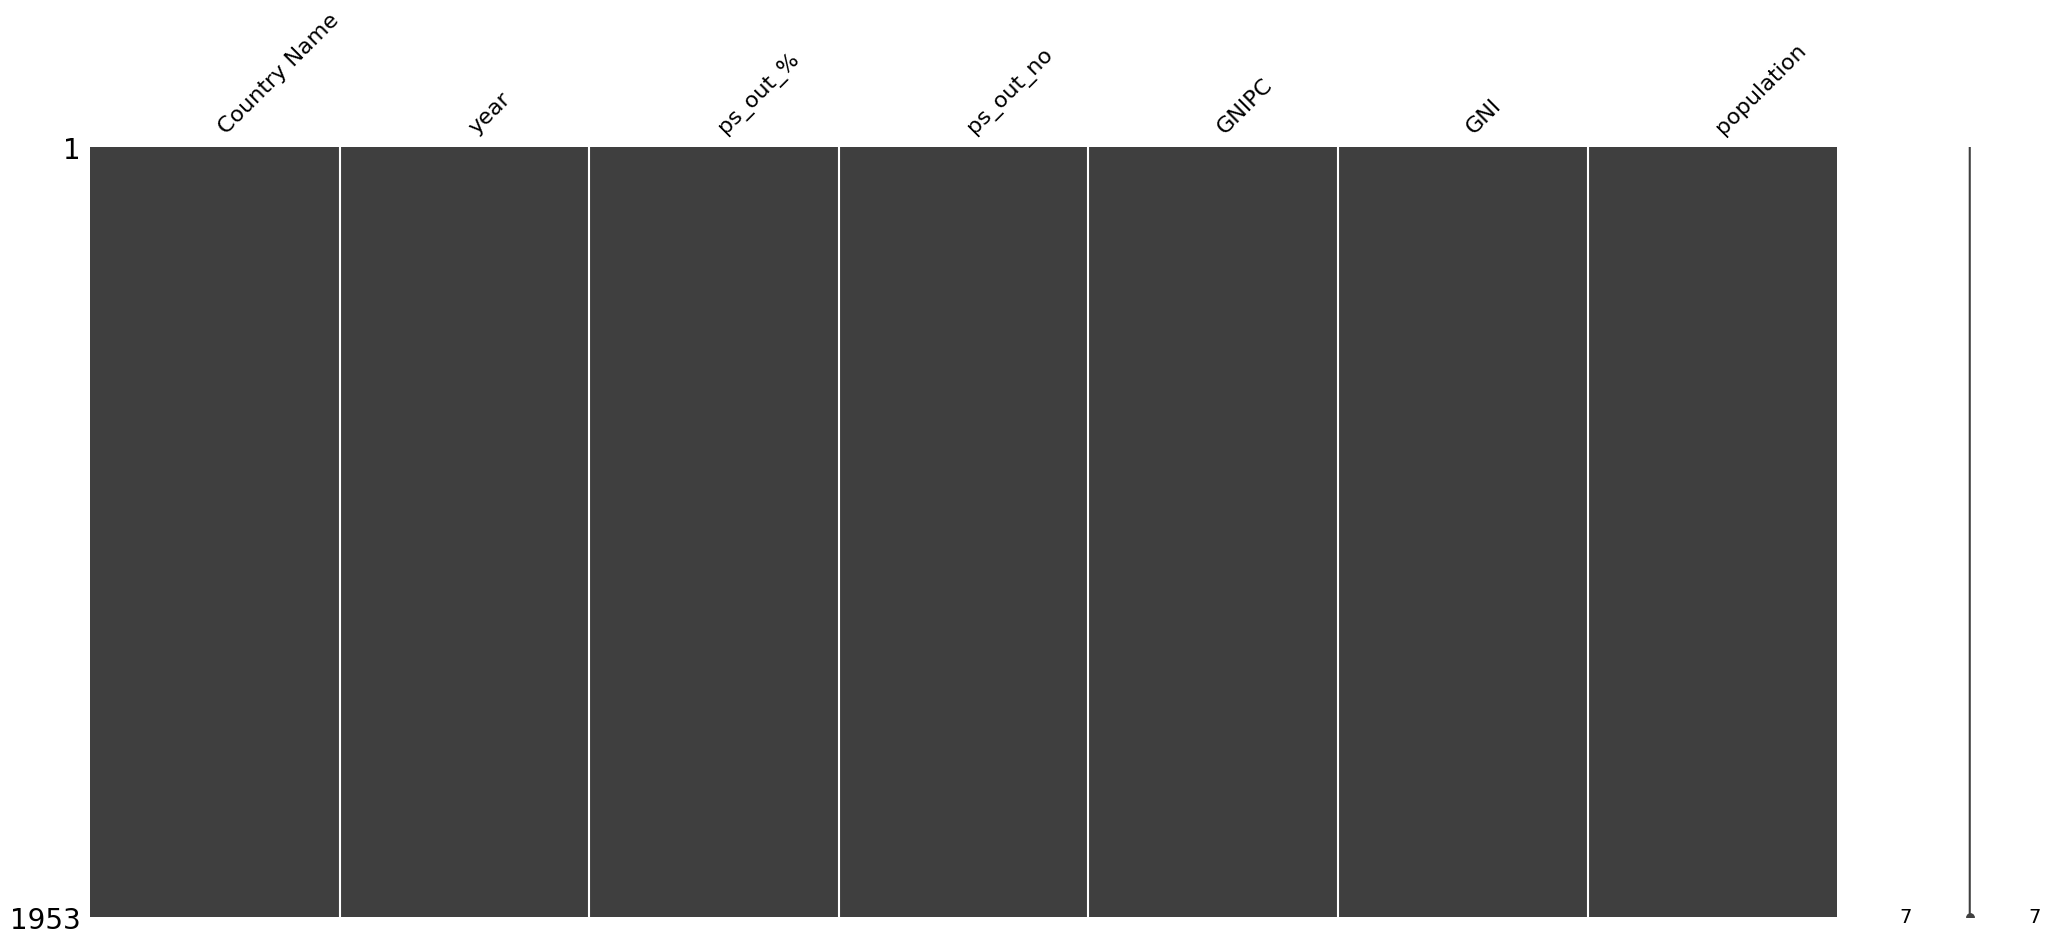

In [151]:
# inspect the missingness
msno.matrix(df)


In [152]:
# what is going on?
print(df.loc['AFG']['primary_out_school_total'][0])

KeyError: 'primary_out_school_total'

In [ ]:
# let's fix it
df.replace(???, np.nan, inplace=True)

msno.matrix(df)

In [ ]:
# only keep the rows that don't have missing values

dropped = df.???()

# what are we inspecting here?
print(dropped.index.nunique())

In [ ]:
# sets are useful for finding differences!
diff_iso = set(df.country.unique()) - set(dropped.country.unique())
len(diff_iso)
print(diff_iso)

In [ ]:
#dropped.to_csv(cwd + "/data/WB_reshaped_nomissing.csv")

#### 3.3 Groupby


In [ ]:
df = dropped.copy()

df.info()

In [ ]:
df['???'] = df['???'].astype('???')

In [ ]:
df.sample(4)

In [ ]:
# only now we can grouby

df.groupby(['country'])['gni_pc'].agg(['???'])

#### 3.4 Features

In [ ]:
df.describe()

In [ ]:
# df['gni_bil'] = round(df['gni']/1_000_000_000, 3)
# df['pop_mil'] = round(df['gni']/1_000_000, 3)
# df['gni_bil_pc'] = round(df['gni_pc']/1_000_000_000, 3)
# df['prim_oos_pct'] = round(df['gni_pc']/1_000_000_000, 3)

Suppose you estimate that working-age population is roughly 60% of the total population. You can create a dependency ratio:

In [ ]:
df['primary_aged_total'] =
df['primary_aged_of_pop'] = 

# using appy

df['dependency'] = df.apply(
    lambda row: row['primary_out_school_total'] / (row['pop'] * 0.6), axis=1
)

df.sample(3)

In [ ]:
# using a lambda function and mapping a dictionary

income_groups = {
    lambda x: x < 1045: 'low',
    lambda x: 1045 <= x < 4095: 'low_mid',
    lambda x: 4095 <= x < 12695: 'upp_mid',
    lambda x: x >= 12695: 'high'
}

df['income_group'] = df['gni_pc'].map(
    lambda x: next((v for k, v in income_groups.items() if k(x)), None)
)
df.income_group.value_counts()

#### 3.5 Extra

In [ ]:
df_highest_year = df.sort_values('???', ascending=False).drop_duplicates('???')
df_highest_year

In [ ]:
df_highest_year.boxplot(column='???')

In [ ]:
df_highest_year.gni_pc.nlargest(10)

In [ ]:
# show the box plot only for a given income group
df_highest_year.loc[???].boxplot(column='gni_pc')

In [ ]:
groups = ['high', 'upp_mid', 'low_mid', 'low']

# Create a figure with subplots
fig, axes = plt.subplots(1, len(groups), figsize=(12, 6))

# Loop through each group and create a boxplot in the corresponding subplot
for i, group in enumerate(groups):
    df_highest_year.loc[df_highest_year['income_group'] == ???].boxplot(column='gni_pc', ax=axes[???])
    axes[i].set_title(group)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# compare
df_highest_year.plot.scatter(x='???', y='???')

In [ ]:
# compare
df_highest_year.

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(1, len(groups), figsize=(12, 6))

# Loop through each group and create a boxplot in the corresponding subplot
for i, group in enumerate(groups):
    ???
    axes[i].set_title(group)

# Adjust layout
plt.tight_layout()
plt.show()

### 4. Background cleaning

In [ ]:
df_WB = pd.read_csv(cwd + '/data/WB_full.csv')
#df_meta = pd.read_csv(cwd + '/data/WB_metadata.csv')

df_WB.head()

In [ ]:
# clean column names
cols_to_clean = df_WB.columns.tolist()
rename_dict = {col: col.split()[0] for col in cols_to_clean if '[YR' in col}
df_WB = df_WB.rename(columns=rename_dict)

The net enrollment rate excludes overage and underage students and more accurately captures the system's coverage and internal efficiency. Differences between the gross enrollment ratio and the net enrollment rate show the incidence of overage and underage enrollments.
https://databank.worldbank.org/metadataglossary/world-development-indicators/series/SE.PRE.ENRR

In [ ]:
df_WB['Series Name'].unique()

In [ ]:
series_to_keep = ['Population, total',
                  'GNI, Atlas method (current US$)', 'GNI per capita, Atlas method (current US$)',
                  'Children out of school, primary',
                  'Children out of school (% of primary school age)'
                  ]

In [ ]:
df_choice = df_WB.loc[df_WB['Series Name'].isin(series_to_keep)]

country_groups = [
    "AFE", "AFW", "ARB", "CSS", "CEB", "EAR", "EAS", "EAP", "TEA", "EMU", 
    "ECS", "ECA", "TEC", "EUU", "FCS", "HPC", "HIC", "IBD", "IBT", "IDB", 
    "IDX", "IDA", "LTE", "LCN", "LAC", "TLA", "LDC", "LMY", "LIC", "LMC", 
    "MEA", "MNA", "TMN", "MIC", "NAC", "INX", "OED", "OSS", "PSS", "PST", 
    "PRE", "SST", "SAS", "TSA", "SSF", "SSA", "TSS", "UMC"]

world = ["WLD"]

filtered_df = df_choice[~df_choice['Country Code'].isin(country_groups + world)]

# download data
#filtered_df.to_csv(cwd + '/data/WB_more_data.csv', index=False)

In [ ]:
filtered_df.sample(5)